In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Datadup --> general set without houses above upper price limit and duplicates 
# Duplicates --> duplicates set ( rows have the same ID )
# outliers --> houses are above upper price 

In [3]:
pd.options.display.max_columns=30
df = pd.read_csv('kc_house_data.csv')
df

id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7        1180   
1          7242     2.0           0     0          3      7        2170   
2         10000     1.0           0     0          3      6         770   
3          5000     1.0           0     0          5      7        1050   
4          8080     1.0           0     0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

# Dropping houses contain bathrooms or bedrooms = 0 

In [6]:
data=df.drop(df[df['bathrooms']==0].index, axis=0)
data=data.drop(data[data['bedrooms']==0].index, axis=0)

# Dropping duplicates from original data frame 

In [7]:
datadup=data.drop_duplicates(subset='id')

# Calculating IQR and finding upper limit for price 

In [8]:
sort_data = np.sort(data['price'])
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(data['price'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')

In [9]:
print('Q1 25 percentile of the given data is, ', Q1)
print('Q2 50 percentile of the given data is, ', Q2)
print('Q3 75 percentile of the given data is, ', Q3)

Q1 25 percentile of the given data is,  322000.0
Q2 50 percentile of the given data is,  450000.0
Q3 75 percentile of the given data is,  645000.0


In [10]:
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Interquartile range is 323000.0


In [11]:
lower = Q1-1.5*IQR
print('lower limit for price = ',lower)


lower limit for price =  -162500.0


In [12]:
upper = Q3+1.5*IQR
print('upper limit for price = ',upper)

upper limit for price =  1129500.0


# house prices are more than our upper limit 

In [13]:
outliers=data[data['price']>upper]

In [14]:
outliers

id             date    price  bedrooms  bathrooms  sqft_living  \
5      7237550310  20140512T000000  1225000         4       4.50         5420   
21     2524049179  20140826T000000  2000000         3       2.75         3050   
49      822039084  20150311T000000  1350000         3       2.50         2753   
69     1802000060  20140612T000000  1325000         5       2.25         3200   
125    4389200955  20150302T000000  1450000         4       2.75         2750   
...           ...              ...      ...       ...        ...          ...   
21568   524059330  20150130T000000  1700000         4       3.50         3830   
21576  9253900271  20150107T000000  3567000         5       4.50         4850   
21590  7430200100  20140514T000000  1222500         4       3.50         4910   
21597   191100405  20150421T000000  1575000         4       3.25         3410   
21600   249000205  20141015T000000  1537000         5       3.75         4470   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5        101930     1.0           0     0          3     11        3890   
21        44867     1.0           0     4          3      9        2330   
49        65005     1.0           1     2          5      9        2165   
69        20158     1.0           0     0          3      8        1600   
125       17789     1.5           0     0          3      8        1980   
...         ...     ...         ...   ...        ...    ...         ...   
21568      8963     2.0           0     0          3     10        3120   
21576     10584     2.0           1     4          3     10        3540   
21590      9444     1.5           0     0          3     11        3110   
21597     10125     2.0           0     0          3     10        3410   
21600      8088     2.0           0     0          3     11        4470   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5               1530      2001             0    98053  47.6561 -122.005   
21               720      1968             0    98040  47.5316 -122.233   
49               588      1953             0    98070  47.4041 -122.451   
69              1600      1965             0    98004  47.6303 -122.215   
125              770      1914          1992    98004  47.6141 -122.212   
...              ...       ...           ...      ...      ...      ...   
21568            710      2014             0    98004  47.5990 -122.197   
21576           1310      2007             0    98008  47.5943 -122.110   
21590           1800      2007             0    98074  47.6502 -122.066   
21597              0      2007             0    98040  47.5653 -122.223   
21600              0      2008             0    98004  47.6321 -122.200   

       sqft_living15  sqft_lot15  
5               4760      101930  
21              4110       20336  
49              2680       72513  
69              3390       20158  
125             3060       11275  
...              ...         ...  
21568           2190       10777  
21576           3470       18270  
21590           4560       11063  
21597           2290       10125  
21600           2780        8964  

[1145 rows x 21 columns]

In [15]:
datadup=datadup.drop(datadup[datadup['price']>upper].index , axis=0)
datadup

id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7        1180   
1          7242     2.0           0     0          3      7        2170   
2         10000     1.0           0     0          3      6         770   
3          5000     1.0           0     0          5      7        1050   
4          8080     1.0           0     0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[20282 rows x 21 columns]

# Searching for dublicates : 

In [16]:
data[data.duplicated(subset='id')]

id             date    price  bedrooms  bathrooms  sqft_living  \
94     6021501535  20141223T000000   700000         3       1.50         1580   
314    4139480200  20141209T000000  1400000         4       3.25         4290   
325    7520000520  20150311T000000   240500         2       1.00         1240   
346    3969300030  20141229T000000   239900         4       1.00         1000   
372    2231500030  20150324T000000   530000         4       2.25         2180   
...           ...              ...      ...       ...        ...          ...   
20181  7853400250  20150219T000000   645000         4       3.50         2910   
20613  2724049222  20141201T000000   220000         2       2.50         1000   
20670  8564860270  20150330T000000   502000         4       2.50         2680   
20780  6300000226  20150504T000000   380000         4       1.00         1200   
21581  7853420110  20150504T000000   625000         3       3.00         2780   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
94         5000     1.0           0     0          3      8        1290   
314       12103     1.0           0     3          3     11        2690   
325       12092     1.0           0     0          3      6         960   
346        7134     1.0           0     0          3      6        1000   
372       10754     1.0           0     0          5      7        1100   
...         ...     ...         ...   ...        ...    ...         ...   
20181      5260     2.0           0     0          3      9        2910   
20613      1092     2.0           0     0          3      7         990   
20670      5539     2.0           0     0          3      8        2680   
20780      2171     1.5           0     0          3      7        1200   
21581      6000     2.0           0     0          3      9        2780   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
94               290      1939             0    98117  47.6870 -122.386   
314             1600      1997             0    98006  47.5503 -122.102   
325              280      1922          1984    98146  47.4957 -122.352   
346                0      1943             0    98178  47.4897 -122.240   
372             1080      1954             0    98133  47.7711 -122.341   
...              ...       ...           ...      ...      ...      ...   
20181              0      2012             0    98065  47.5168 -121.883   
20613             10      2004             0    98118  47.5419 -122.271   
20670              0      2013             0    98045  47.4759 -121.734   
20780              0      1933             0    98133  47.7076 -122.342   
21581              0      2013             0    98065  47.5184 -121.886   

       sqft_living15  sqft_lot15  
94              1570        4500  
314             3860       11244  
325             1820        7460  
346             1020        7138  
372             1810        6929  
...              ...         ...  
20181           2910        5260  
20613           1330        1466  
20670           2680        5992  
20780           1130        1598  
21581           2850        6000  

[177 rows x 21 columns]

In [17]:
data[data['id'] == 6021501535 ]

id             date   price  bedrooms  bathrooms  sqft_living  \
93  6021501535  20140725T000000  430000         3        1.5         1580   
94  6021501535  20141223T000000  700000         3        1.5         1580   

    sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
93      5000     1.0           0     0          3      8        1290   
94      5000     1.0           0     0          3      8        1290   

    sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
93            290      1939             0    98117  47.687 -122.386   
94            290      1939             0    98117  47.687 -122.386   

    sqft_living15  sqft_lot15  
93           1570        4500  
94           1570        4500

# Changing time column to regular date time 

In [18]:

data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data['year']= data['date'].dt.year
data['month']= data['date'].dt.month
data['day']= data['date'].dt.day
data

id       date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900         3       1.00         1180   
1      6414100192 2014-12-09  538000         3       2.25         2570   
2      5631500400 2015-02-25  180000         2       1.00          770   
3      2487200875 2014-12-09  604000         4       3.00         1960   
4      1954400510 2015-02-18  510000         3       2.00         1680   
...           ...        ...     ...       ...        ...          ...   
21608   263000018 2014-05-21  360000         3       2.50         1530   
21609  6600060120 2015-02-23  400000         4       2.50         2310   
21610  1523300141 2014-06-23  402101         2       0.75         1020   
21611   291310100 2015-01-16  400000         3       2.50         1600   
21612  1523300157 2014-10-15  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7        1180   
1          7242     2.0           0     0          3      7        2170   
2         10000     1.0           0     0          3      6         770   
3          5000     1.0           0     0          5      7        1050   
4          8080     1.0           0     0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  year  month  day  
0               1340        5650  2014     10   13  
1               1690        7639  2014     12    9  
2               2720        8062  2015      2   25  
3               1360        5000  2014     12    9  
4               1800        7503  2015      2   18  
...              ...         ...   ...    ...  ...  
21608           1530        1509  2014      5   21  
21609           1830        7200  2015      2   23  
21610           1020        2007  2014      6   23  
21611           1410        1287  2015      1   16  
21612           1020        1357  2014     10   15  

[21597 rows x 24 columns]

In [19]:

datadup['date'] = pd.to_datetime(datadup['date'], dayfirst=True)
datadup['year']= datadup['date'].dt.year
datadup['month']= datadup['date'].dt.month
datadup['day']= datadup['date'].dt.day
datadup

id       date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900         3       1.00         1180   
1      6414100192 2014-12-09  538000         3       2.25         2570   
2      5631500400 2015-02-25  180000         2       1.00          770   
3      2487200875 2014-12-09  604000         4       3.00         1960   
4      1954400510 2015-02-18  510000         3       2.00         1680   
...           ...        ...     ...       ...        ...          ...   
21608   263000018 2014-05-21  360000         3       2.50         1530   
21609  6600060120 2015-02-23  400000         4       2.50         2310   
21610  1523300141 2014-06-23  402101         2       0.75         1020   
21611   291310100 2015-01-16  400000         3       2.50         1600   
21612  1523300157 2014-10-15  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7        1180   
1          7242     2.0           0     0          3      7        2170   
2         10000     1.0           0     0          3      6         770   
3          5000     1.0           0     0          5      7        1050   
4          8080     1.0           0     0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  year  month  day  
0               1340        5650  2014     10   13  
1               1690        7639  2014     12    9  
2               2720        8062  2015      2   25  
3               1360        5000  2014     12    9  
4               1800        7503  2015      2   18  
...              ...         ...   ...    ...  ...  
21608           1530        1509  2014      5   21  
21609           1830        7200  2015      2   23  
21610           1020        2007  2014      6   23  
21611           1410        1287  2015      1   16  
21612           1020        1357  2014     10   15  

[20282 rows x 24 columns]

In [20]:
year_2014=data[data['year']==2014]
year_2015=data[data['year']==2015]

# Separting duplicates in different data frame 

In [21]:
multi_house = data.drop_duplicates().id.value_counts().gt(1)
duplicates=data.loc[data.id.isin(multi_house[multi_house].index)]
duplicates

id       date    price  bedrooms  bathrooms  sqft_living  \
93     6021501535 2014-07-25   430000         3       1.50         1580   
94     6021501535 2014-12-23   700000         3       1.50         1580   
313    4139480200 2014-06-18  1384000         4       3.25         4290   
314    4139480200 2014-12-09  1400000         4       3.25         4290   
324    7520000520 2014-09-05   232000         2       1.00         1240   
...           ...        ...      ...       ...        ...          ...   
20670  8564860270 2015-03-30   502000         4       2.50         2680   
20779  6300000226 2014-06-26   240000         4       1.00         1200   
20780  6300000226 2015-05-04   380000         4       1.00         1200   
21580  7853420110 2014-10-03   594866         3       3.00         2780   
21581  7853420110 2015-05-04   625000         3       3.00         2780   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
93         5000     1.0           0     0          3      8        1290   
94         5000     1.0           0     0          3      8        1290   
313       12103     1.0           0     3          3     11        2690   
314       12103     1.0           0     3          3     11        2690   
324       12092     1.0           0     0          3      6         960   
...         ...     ...         ...   ...        ...    ...         ...   
20670      5539     2.0           0     0          3      8        2680   
20779      2171     1.5           0     0          3      7        1200   
20780      2171     1.5           0     0          3      7        1200   
21580      6000     2.0           0     0          3      9        2780   
21581      6000     2.0           0     0          3      9        2780   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
93               290      1939             0    98117  47.6870 -122.386   
94               290      1939             0    98117  47.6870 -122.386   
313             1600      1997             0    98006  47.5503 -122.102   
314             1600      1997             0    98006  47.5503 -122.102   
324              280      1922          1984    98146  47.4957 -122.352   
...              ...       ...           ...      ...      ...      ...   
20670              0      2013             0    98045  47.4759 -121.734   
20779              0      1933             0    98133  47.7076 -122.342   
20780              0      1933             0    98133  47.7076 -122.342   
21580              0      2013             0    98065  47.5184 -121.886   
21581              0      2013             0    98065  47.5184 -121.886   

       sqft_living15  sqft_lot15  year  month  day  
93              1570        4500  2014      7   25  
94              1570        4500  2014     12   23  
313             3860       11244  2014      6   18  
314             3860       11244  2014     12    9  
324             1820        7460  2014      9    5  
...              ...         ...   ...    ...  ...  
20670           2680        5992  2015      3   30  
20779           1130        1598  2014      6   26  
20780           1130        1598  2015      5    4  
21580           2850        6000  2014     10    3  
21581           2850        6000  2015      5    4  

[353 rows x 24 columns]

In [22]:
fig = px.scatter_mapbox(duplicates, lat='lat', lon='long',
                        mapbox_style="stamen-terrain",color='price',range_color=[10000,1000000],color_continuous_scale="Blues"
)

               


fig.show()

In [23]:
# finding house renovated from duplicates set 

In [24]:
house_renovated2= pd.pivot_table(data=duplicates,index='month',columns='year',values='yr_renovated',aggfunc=np.count_nonzero) 
house_renovated2.fillna(0,inplace=True)  
house_renovated2

year   2014  2015
month            
1       0.0   1.0
2       0.0   0.0
3       0.0   1.0
4       0.0   1.0
5       0.0   0.0
6       0.0   0.0
7       1.0   0.0
8       1.0   0.0
9       2.0   0.0
10      1.0   0.0
11      0.0   0.0
12      0.0   0.0

In [25]:
duplicates[duplicates['id']==795000620] # the only house that are duplicated three times 

id       date   price  bedrooms  bathrooms  sqft_living  \
17602  795000620 2014-09-24  115000         3        1.0         1080   
17603  795000620 2014-12-15  124000         3        1.0         1080   
17604  795000620 2015-03-11  157000         3        1.0         1080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
17602      6250     1.0           0     0          2      5        1080   
17603      6250     1.0           0     0          2      5        1080   
17604      6250     1.0           0     0          2      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17602              0      1950             0    98168  47.5045 -122.33   
17603              0      1950             0    98168  47.5045 -122.33   
17604              0      1950             0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  year  month  day  
17602           1070        6250  2014      9   24  
17603           1070        6250  2014     12   15  
17604           1070        6250  2015      3   11

In [26]:
dup=data[data.duplicated(subset='id')]
first_sales=duplicates['price'].sum()-dup['price'].sum()
secound_sales=dup['price'].sum()
(secound_sales-first_sales)/first_sales

0.3895122349419341

# exploratory data analysis '' EDA '' 

Pearson correlation matrix 

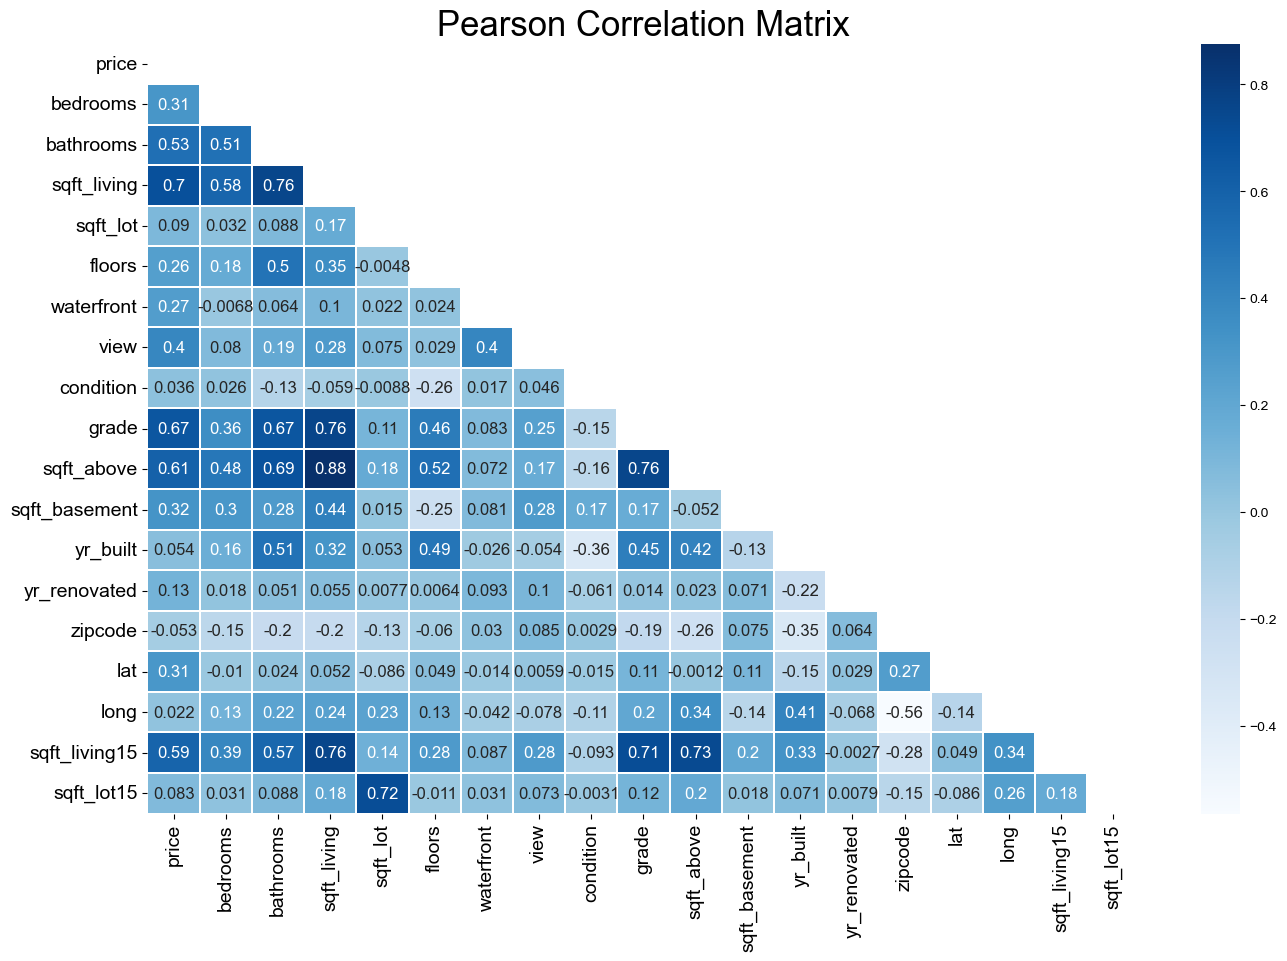

In [27]:
allfeatures = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
mask = np.zeros_like(data[allfeatures].corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(data[allfeatures].corr(),mask=mask,annot=True,annot_kws={"size":12},cmap="Blues",linewidths=0.25)
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Pearson Correlation Matrix',fontsize=25)
plt.show()

<AxesSubplot:xlabel='waterfront', ylabel='price'>

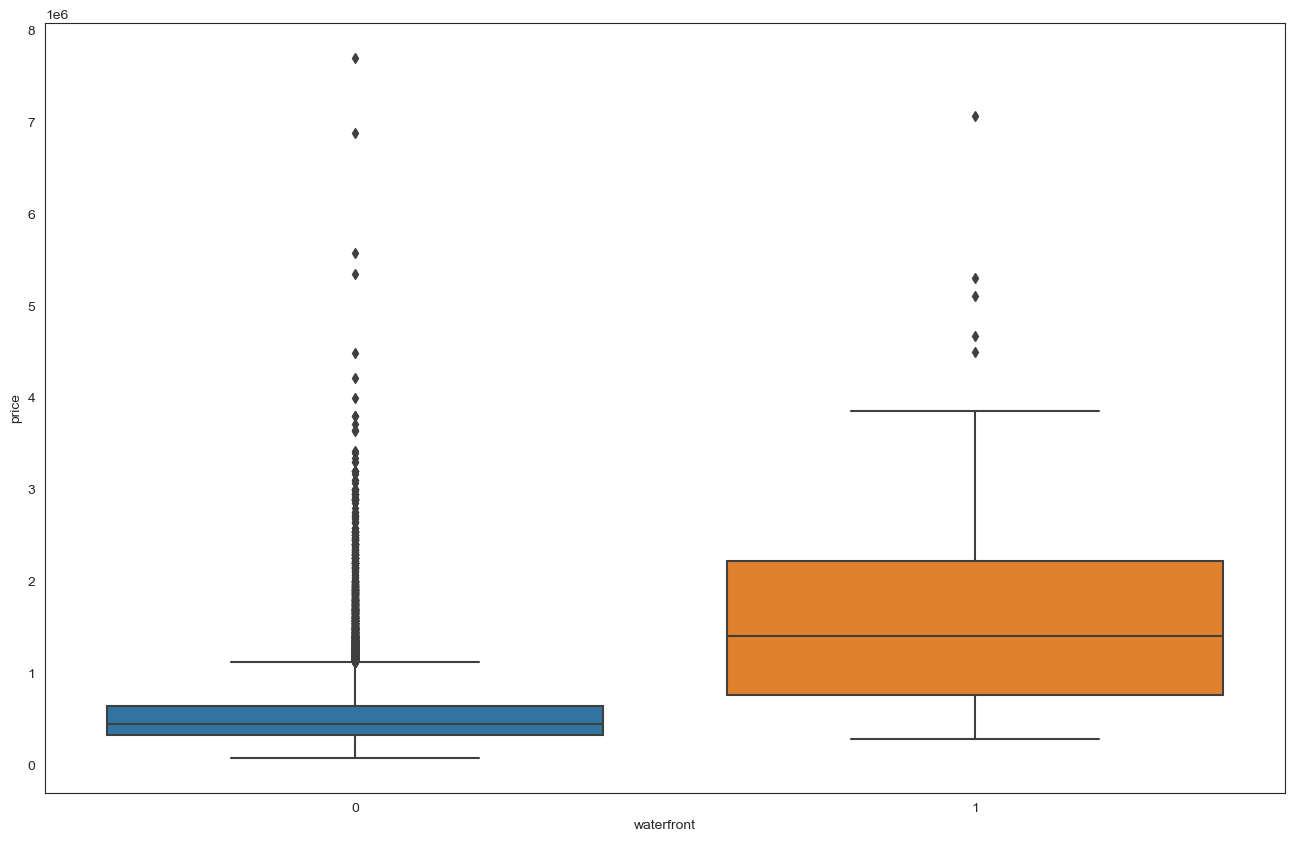

In [28]:
plt.figure(figsize=(16,10))
sns.boxplot(x='waterfront',y='price',data=data)


<AxesSubplot:xlabel='condition', ylabel='price'>

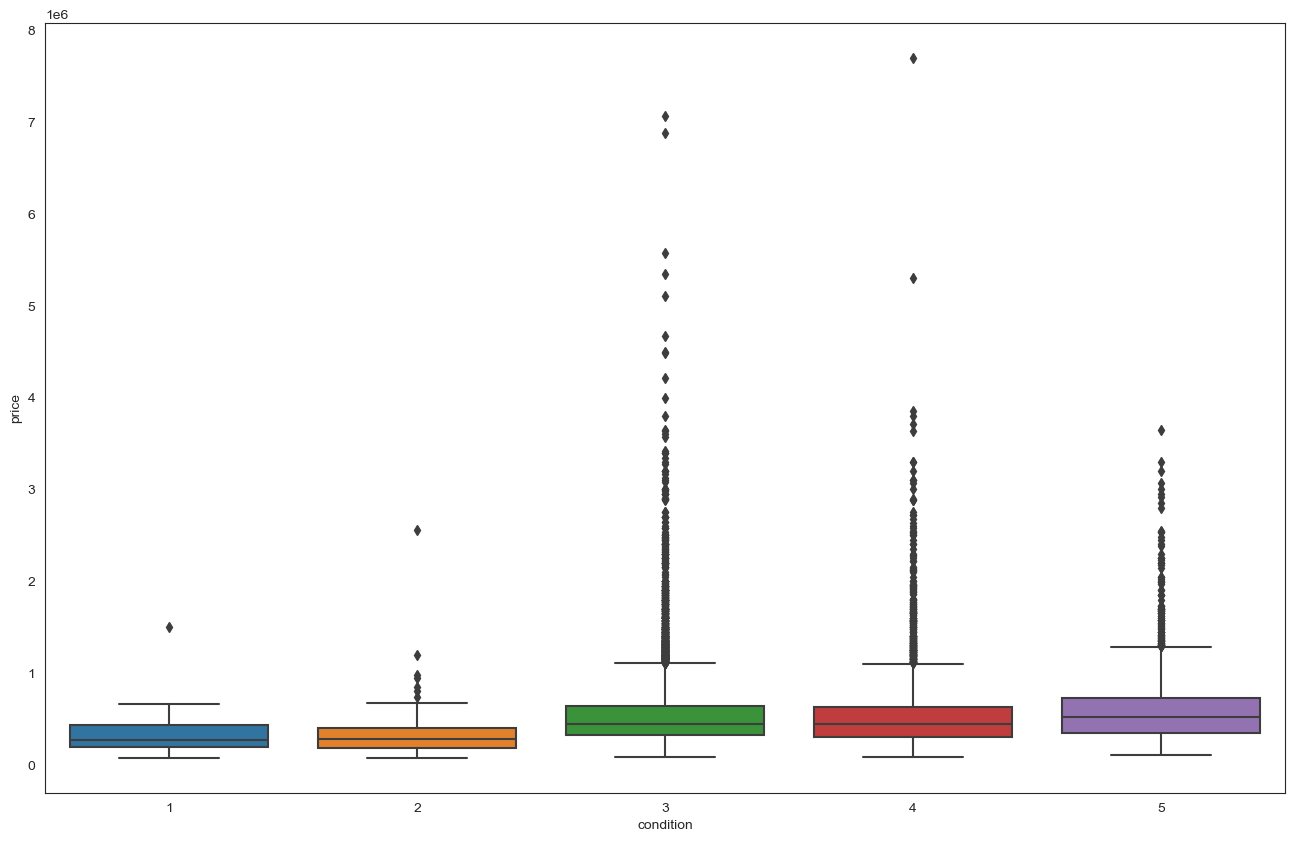

In [29]:
plt.figure(figsize=(16,10))
sns.boxplot(x='condition',y='price',data=data)

<AxesSubplot:xlabel='grade', ylabel='price'>

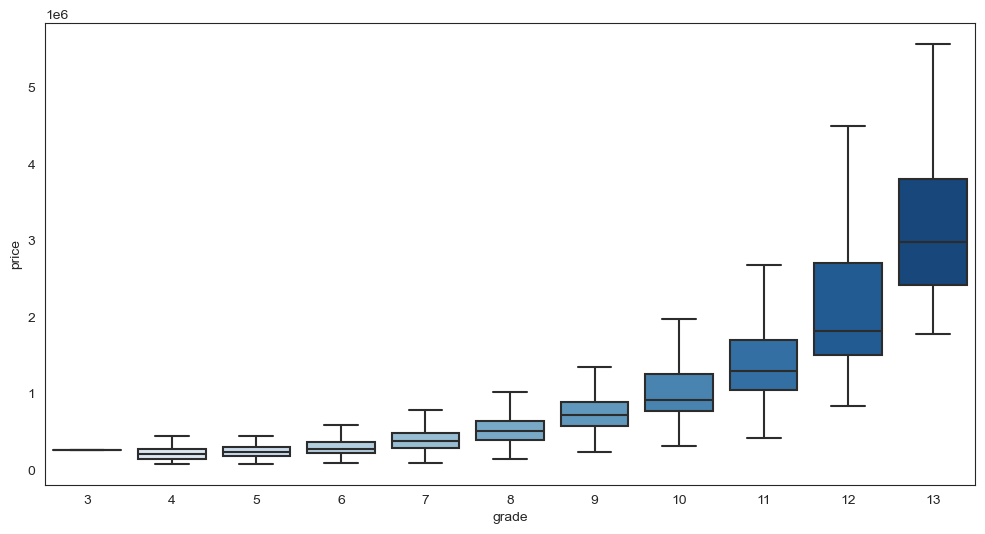

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='grade',y='price',data=data,showfliers=False,palette="Blues")

# exploring house sales between 2014 & 2015 

In [31]:
house_sales= pd.pivot_table(data=datadup,index='month',columns='year',values='day',aggfunc=np.count_nonzero) 
house_sales.fillna(0,inplace=True)  
house_sales

year     2014    2015
month                
1         0.0   907.0
2         0.0  1166.0
3         0.0  1735.0
4         0.0  2059.0
5      1667.0   593.0
6      2054.0     0.0
7      2089.0     0.0
8      1844.0     0.0
9      1692.0     0.0
10     1765.0     0.0
11     1332.0     0.0
12     1379.0     0.0

In [32]:
house_salesprice= pd.pivot_table(data=datadup,index='month',columns='year',values='price',aggfunc=np.sum) 
house_salesprice.fillna(0,inplace=True)  
house_salesprice

year           2014          2015
month                            
1      0.000000e+00  4.153950e+08
2      0.000000e+00  5.317300e+08
3      0.000000e+00  8.341226e+08
4      0.000000e+00  1.025779e+09
5      8.044944e+08  2.835261e+08
6      1.007414e+09  0.000000e+00
7      1.010004e+09  0.000000e+00
8      8.783612e+08  0.000000e+00
9      8.020376e+08  0.000000e+00
10     8.335669e+08  0.000000e+00
11     6.170073e+08  0.000000e+00
12     6.386834e+08  0.000000e+00

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

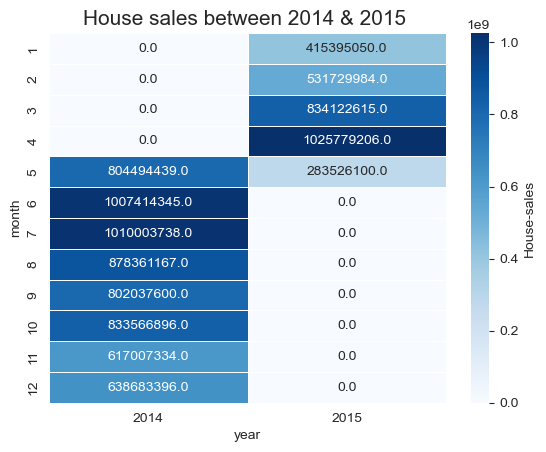

In [33]:
plt.title('House sales between 2014 & 2015 ',fontsize=15)
ax = sns.heatmap(house_salesprice, cmap="Blues", annot=True, fmt=".1f",linewidth=.5,cbar_kws={'label': 'House-sales'},)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

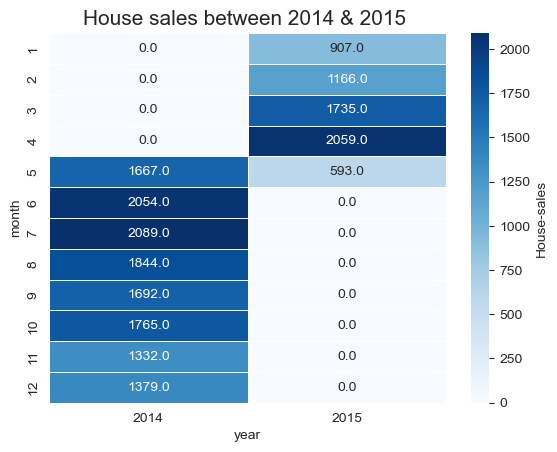

In [34]:
plt.title('House sales between 2014 & 2015 ',fontsize=15)
ax = sns.heatmap(house_sales, cmap="Blues", annot=True, fmt=".1f",linewidth=.5,cbar_kws={'label': 'House-sales'},)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Houses renovation between 2014 & 2015

In [35]:
house_renovated= pd.pivot_table(data=datadup,index='month',columns='year',values='yr_renovated',aggfunc=np.count_nonzero) 
house_renovated.fillna(0,inplace=True)  
house_renovated


year   2014  2015
month            
1       0.0  30.0
2       0.0  28.0
3       0.0  64.0
4       0.0  65.0
5      88.0  15.0
6      70.0   0.0
7      84.0   0.0
8      65.0   0.0
9      76.0   0.0
10     75.0   0.0
11     56.0   0.0
12     46.0   0.0

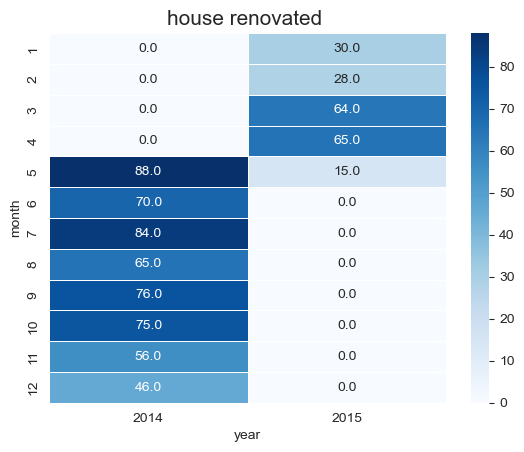

In [36]:
plt.title('house renovated ',fontsize=15)
ax = sns.heatmap(house_renovated, cmap="Blues", annot=True, fmt=".1f",linewidth=.5)

Prices distripution for Kings county in Washington DC 

In [37]:
fig = px.scatter_mapbox(data, lat='lat', lon='long',
                        mapbox_style="stamen-terrain",color='price',range_color=[10000,1000000],color_continuous_scale="Blues"
)

fig.show()

<AxesSubplot:xlabel='month', ylabel='Count'>

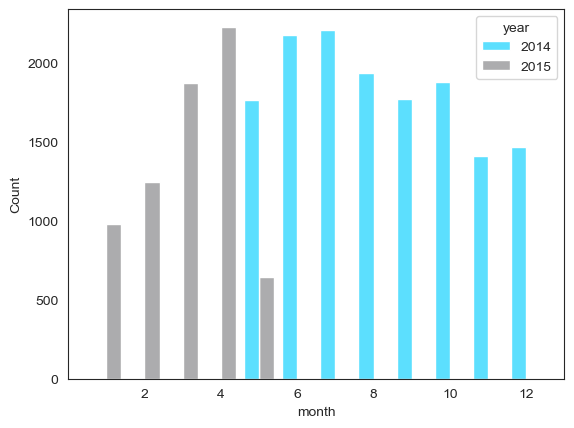

In [38]:
sns.histplot(data=data, x="month", bins=10,hue="year",palette="blend:#26D5FE,#919193"
,discrete=True,shrink=.8, multiple="dodge")

<AxesSubplot:xlabel='month', ylabel='price'>

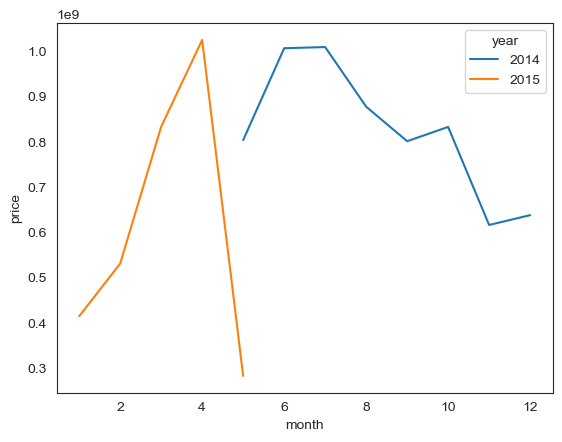

In [39]:
house_renovated= pd.pivot_table(data=datadup,index='month',columns='year',values='price',aggfunc=np.sum) 
house_renovated.plot(ylabel='price')


In [40]:
hr_2014 = house_renovated[2014].sum()
hr_2014

6591568915.0

In [41]:
hr_2015 = house_renovated[2015].sum()
hr_2015

3090552955.0

In [42]:
hr_2014+hr_2015

9682121870.0

Text(468.01587301587307, 0.5, 'Price ')

<Figure size 1600x1000 with 0 Axes>

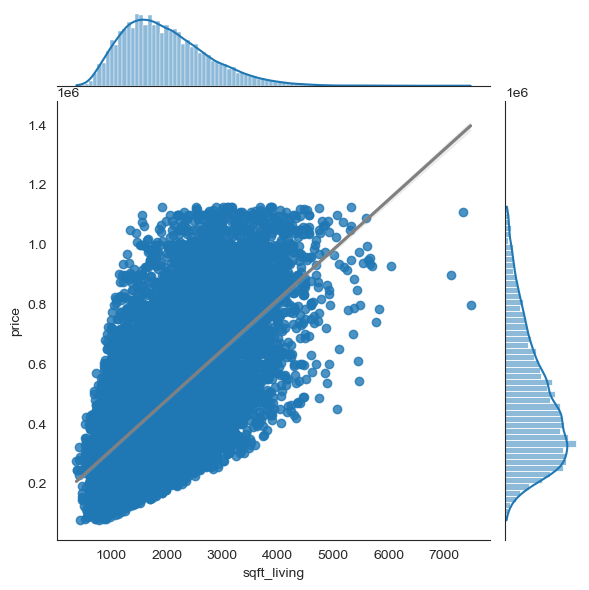

In [43]:
plt.figure(figsize=(16,10))
sns.jointplot(data=datadup, x="sqft_living", y="price", kind="reg",joint_kws={'line_kws':{'color':'gray'}})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel( "Square_ft living " , size = 16 )
plt.ylabel( "Price " , size = 16 )

Text(468.01587301587307, 0.5, 'Price ')

<Figure size 1600x1000 with 0 Axes>

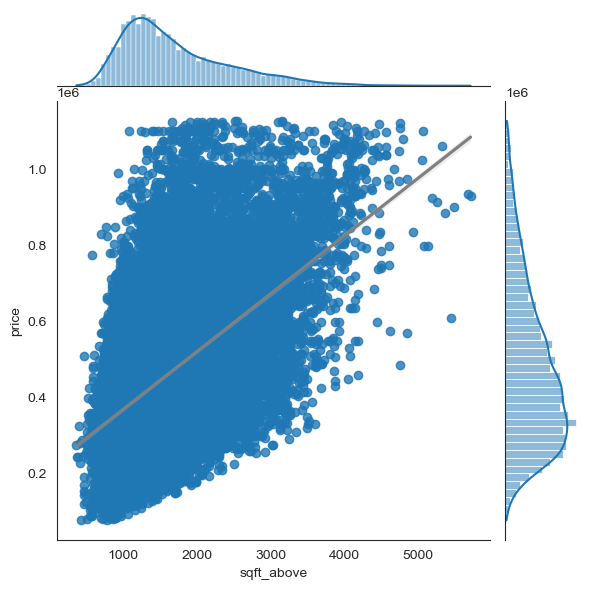

In [44]:
plt.figure(figsize=(16,10))
sns.jointplot(data=datadup, x="sqft_above", y="price", kind="reg",joint_kws={'line_kws':{'color':'gray'}})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel( "Square_ft above " , size = 16 )
plt.ylabel( "Price " , size = 16 )

In [45]:
features=data[['date','grade','condition','sqft_living','sqft_above','lat','long','yr_renovated','yr_built','waterfront']]

In [46]:
features

date  grade  condition  sqft_living  sqft_above      lat     long  \
0     2014-10-13      7          3         1180        1180  47.5112 -122.257   
1     2014-12-09      7          3         2570        2170  47.7210 -122.319   
2     2015-02-25      6          3          770         770  47.7379 -122.233   
3     2014-12-09      7          5         1960        1050  47.5208 -122.393   
4     2015-02-18      8          3         1680        1680  47.6168 -122.045   
...          ...    ...        ...          ...         ...      ...      ...   
21608 2014-05-21      8          3         1530        1530  47.6993 -122.346   
21609 2015-02-23      8          3         2310        2310  47.5107 -122.362   
21610 2014-06-23      7          3         1020        1020  47.5944 -122.299   
21611 2015-01-16      8          3         1600        1600  47.5345 -122.069   
21612 2014-10-15      7          3         1020        1020  47.5941 -122.299   

       yr_renovated  yr_built  waterfront  
0                 0      1955           0  
1              1991      1951           0  
2                 0      1933           0  
3                 0      1965           0  
4                 0      1987           0  
...             ...       ...         ...  
21608             0      2009           0  
21609             0      2014           0  
21610             0      2009           0  
21611             0      2004           0  
21612             0      2008           0  

[21597 rows x 10 columns]

In [47]:
y = data['price']

# Prices out of range 

In [48]:
outliers

id             date    price  bedrooms  bathrooms  sqft_living  \
5      7237550310  20140512T000000  1225000         4       4.50         5420   
21     2524049179  20140826T000000  2000000         3       2.75         3050   
49      822039084  20150311T000000  1350000         3       2.50         2753   
69     1802000060  20140612T000000  1325000         5       2.25         3200   
125    4389200955  20150302T000000  1450000         4       2.75         2750   
...           ...              ...      ...       ...        ...          ...   
21568   524059330  20150130T000000  1700000         4       3.50         3830   
21576  9253900271  20150107T000000  3567000         5       4.50         4850   
21590  7430200100  20140514T000000  1222500         4       3.50         4910   
21597   191100405  20150421T000000  1575000         4       3.25         3410   
21600   249000205  20141015T000000  1537000         5       3.75         4470   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5        101930     1.0           0     0          3     11        3890   
21        44867     1.0           0     4          3      9        2330   
49        65005     1.0           1     2          5      9        2165   
69        20158     1.0           0     0          3      8        1600   
125       17789     1.5           0     0          3      8        1980   
...         ...     ...         ...   ...        ...    ...         ...   
21568      8963     2.0           0     0          3     10        3120   
21576     10584     2.0           1     4          3     10        3540   
21590      9444     1.5           0     0          3     11        3110   
21597     10125     2.0           0     0          3     10        3410   
21600      8088     2.0           0     0          3     11        4470   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5               1530      2001             0    98053  47.6561 -122.005   
21               720      1968             0    98040  47.5316 -122.233   
49               588      1953             0    98070  47.4041 -122.451   
69              1600      1965             0    98004  47.6303 -122.215   
125              770      1914          1992    98004  47.6141 -122.212   
...              ...       ...           ...      ...      ...      ...   
21568            710      2014             0    98004  47.5990 -122.197   
21576           1310      2007             0    98008  47.5943 -122.110   
21590           1800      2007             0    98074  47.6502 -122.066   
21597              0      2007             0    98040  47.5653 -122.223   
21600              0      2008             0    98004  47.6321 -122.200   

       sqft_living15  sqft_lot15  
5               4760      101930  
21              4110       20336  
49              2680       72513  
69              3390       20158  
125             3060       11275  
...              ...         ...  
21568           2190       10777  
21576           3470       18270  
21590           4560       11063  
21597           2290       10125  
21600           2780        8964  

[1145 rows x 21 columns]

In [49]:
fig = px.scatter_mapbox(outliers, lat='lat', lon='long',
                        mapbox_style="stamen-terrain",color='price',range_color=[1000000,3000000],color_continuous_scale="Blues"
)

               


fig.show()

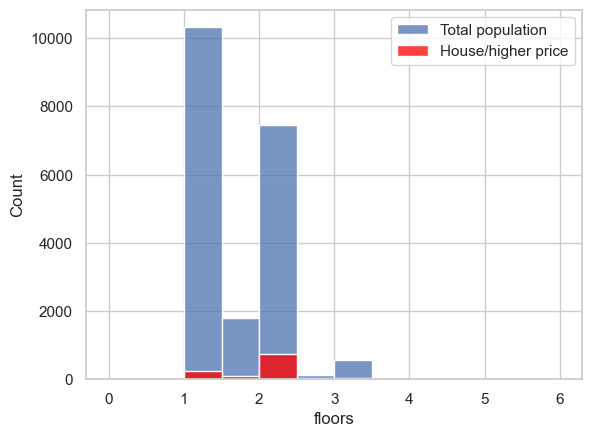

In [50]:
sns.set(style="whitegrid")
sns.histplot(data=datadup,x='floors',binrange=[0,6],binwidth=0.5,label="Total population")
sns.histplot(data=outliers,x='floors',binrange=[0,6],binwidth=0.5,color='red',label="House/higher price")
plt.legend()

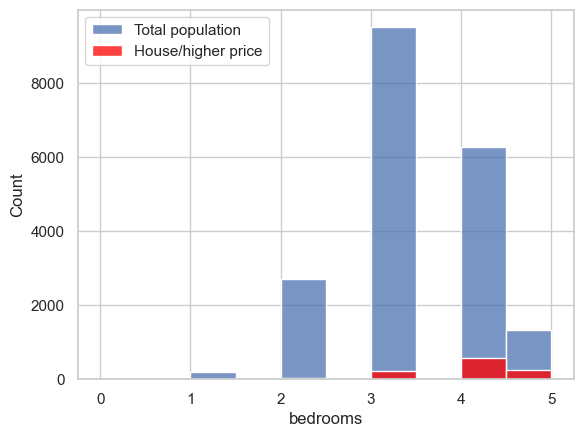

In [51]:
sns.set(style="whitegrid")
sns.histplot(data=datadup,x='bedrooms',binrange=[0,5],binwidth=0.5,label="Total population")
sns.histplot(data=outliers,x='bedrooms',binrange=[0,5],binwidth=0.5,color='red',label="House/higher price")
plt.legend()

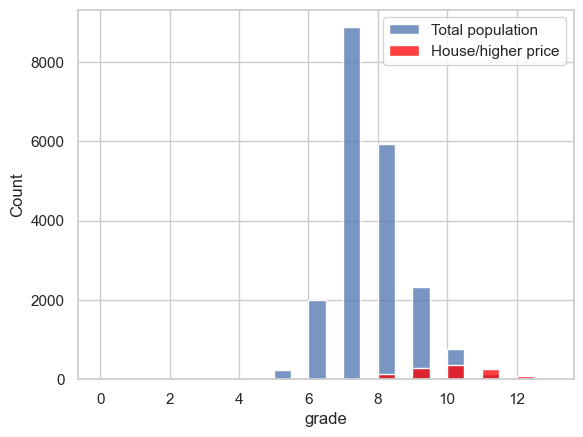

In [52]:
sns.set(style="whitegrid")
sns.histplot(data=datadup,x='grade',binrange=[0,13],binwidth=0.5,label="Total population")
sns.histplot(data=outliers,x='grade',binrange=[0,13],binwidth=0.5,color='red',label="House/higher price")
plt.legend()

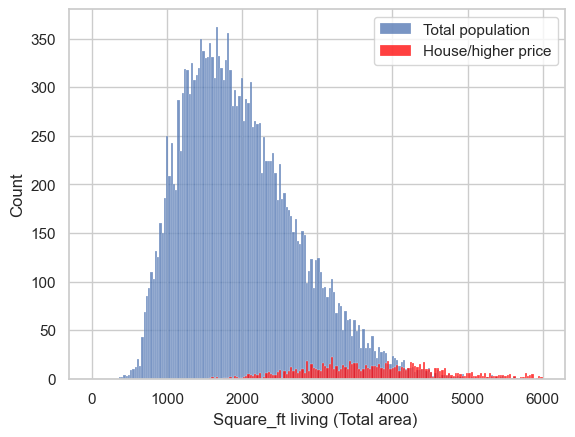

In [53]:
sns.set(style="whitegrid")
sns.histplot(data=datadup,x='sqft_living',binrange=[0,6000],binwidth=30,label="Total population")
sns.histplot(data=outliers,x='sqft_living',binrange=[0,6000],binwidth=30,color='red',label="House/higher price")
plt.xlabel( "Square_ft living (Total area) " )
plt.legend()